In [48]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [28]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1, )

In [53]:
val, count = np.unique(y_train, return_counts=True)
val_count = dict(zip(val, count))
val_count

{np.uint8(0): np.int64(5000),
 np.uint8(1): np.int64(5000),
 np.uint8(2): np.int64(5000),
 np.uint8(3): np.int64(5000),
 np.uint8(4): np.int64(5000),
 np.uint8(5): np.int64(5000),
 np.uint8(6): np.int64(5000),
 np.uint8(7): np.int64(5000),
 np.uint8(8): np.int64(5000),
 np.uint8(9): np.int64(5000)}

In [4]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [5]:
def plot_image(X, y, idx):
  plt.figure(figsize=(15, 2))
  plt.imshow(X[idx])
  plt.xlabel(classes[y[idx]])

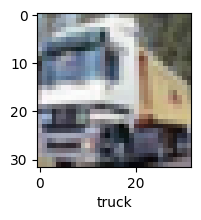

In [11]:
plot_image(X_train, y_train, 1)

In [7]:
X_train = X_train / 255
X_test = X_test / 255

In [8]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (32, 32, 3)),
    keras.layers.Dense(2000, activation='relu'),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer = 'SGD', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
model.fit(X_train, y_train, epochs = 10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.3001 - loss: 1.9383
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4176 - loss: 1.6552
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4485 - loss: 1.5663
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4694 - loss: 1.5001
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4879 - loss: 1.4502
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5068 - loss: 1.3980
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5237 - loss: 1.3581
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5280 - loss: 1.3424
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5420 - loss: 1.2992
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5582 - loss: 1.2629


In [26]:
cnn = keras.Sequential([
    keras.layers.Conv2D(input_shape = (32, 32, 3), kernel_size=(3, 3), filters = 32, activation = 'relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(kernel_size=(3, 3), filters = 64, activation = 'relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
cnn.compile(optimizer = 'SGD', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
cnn.fit(X_train, y_train, epochs = 10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6589 - loss: 0.9801
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6766 - loss: 0.9370
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6862 - loss: 0.8995
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6947 - loss: 0.8667
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7111 - loss: 0.8357
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7165 - loss: 0.8171
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7292 - loss: 0.7840
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7382 - loss: 0.7560
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7447 - loss: 0.7324
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7502 - loss: 0.7212


In [30]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5839 - loss: 1.1750


[1.1882437467575073, 0.5800999999046326]

In [37]:
ypred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [40]:
y_pred = np.argmax(ypred, axis = 1)

array([3, 8, 8, ..., 5, 4, 7])

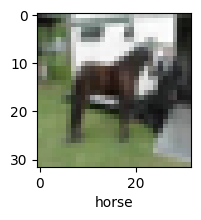

In [47]:
plot_image(X_test, y_pred, 20)

In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.63      0.64      1000
           1       0.72      0.71      0.72      1000
           2       0.41      0.33      0.37      1000
           3       0.49      0.20      0.29      1000
           4       0.40      0.68      0.51      1000
           5       0.54      0.48      0.51      1000
           6       0.74      0.60      0.66      1000
           7       0.58      0.73      0.65      1000
           8       0.69      0.74      0.72      1000
           9       0.62      0.70      0.66      1000

    accuracy                           0.58     10000
   macro avg       0.59      0.58      0.57     10000
weighted avg       0.59      0.58      0.57     10000

